# Read data

In [6]:
import pandas as pd

counts = pd.read_csv('freq.tsv', sep='\t')
counts

,chrom,pos,freq1,freq2
0,NC_000962.3,11,0.012986,0.0
1,NC_000962.3,19,0.051130,0.0
2,NC_000962.3,22,0.061681,0.0
3,NC_000962.3,29,0.100754,0.0
4,NC_000962.3,31,0.110377,0.0
...,...,...,...,...
906450,NC_000962.3,4411517,0.044870,0.0
906451,NC_000962.3,4411518,0.039420,0.0
906452,NC_000962.3,4411519,0.035014,0.0
906453,NC_000962.3,4411522,0.025275,0.0


# Quick look at the histogram of each frequency to help us spot potential thresholds

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bf899b7f0>,
      dtype=object)

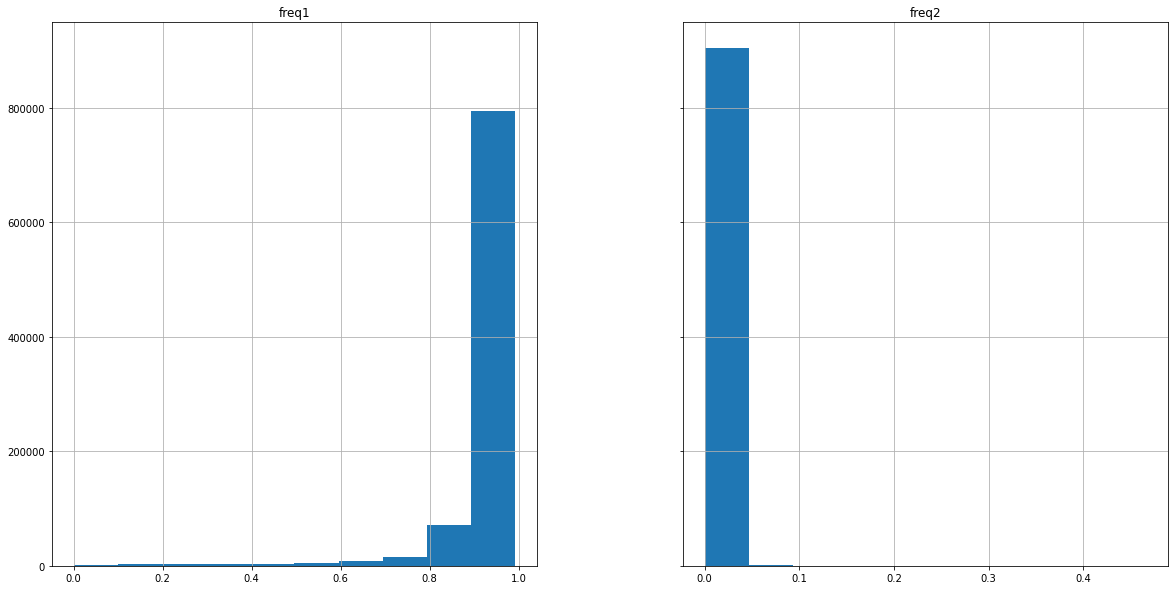

In [96]:
counts.hist(column=['freq1', 'freq2'], sharey=True, layout=(1, 2), figsize=(20, 10))

So it seems `freq1 > 0.9` or `freq2 < 0.05` would give too many positions, so we avoid those

# Zoom in on freq1 <= 0.9 and freq2 >= 0.05

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bf87670b8>]],
      dtype=object)

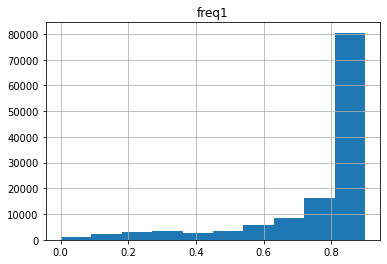

In [97]:
freq1 = counts[counts['freq1'] <= 0.9]
freq2 = counts[counts['freq2'] >= 0.05]
freq1.hist(column=['freq1'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0bf86d27b8>]],
      dtype=object)

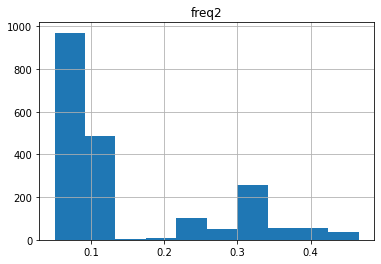

In [98]:
freq2.hist(column=['freq2'])

## It seems they sum up to around 100k

In [100]:
interesting = counts[
    (counts['freq1'] <= 0.9) | (counts['freq2'] >= 0.05)
]
len(interesting.index)

127067

# Randomly take 100k positions

In [101]:
interesting.sample(100000)

,chrom,pos,freq1,freq2
491844,NC_000962.3,2415726,0.785507,0.000116
733528,NC_000962.3,3604979,0.886029,0.000116
824818,NC_000962.3,4046053,0.885333,0.000812
100521,NC_000962.3,498306,0.825507,0.000116
185094,NC_000962.3,878585,0.849971,0.000000
...,...,...,...,...
409130,NC_000962.3,1959049,0.694377,0.000000
843536,NC_000962.3,4136764,0.879072,0.000116
403916,NC_000962.3,1936506,0.886725,0.000116
868312,NC_000962.3,4244857,0.844870,0.000116
